# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [ALVIAN]
- **Email:** [alvianrmli@gmail.com]
- **ID Dicoding:** [mc319d5y0382 ALVIAN]

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan jumlah penyewaan sepeda untuk pelanggan casual dan registered saat musim berganti, dan musim mana yang mengalami perubahan paling signifikan?
- Bagaimana tren penggunaan sepeda berdasarkan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Code dibawah untuk menampilkan data dari dataset hour.csv dan juga menampilkan 5 data pertama dari dataset tersebut

In [ ]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Code dibawah untuk menampilkan data dari dataset day.csv dan juga menampilkan 5 data pertama dari dataset tersebut

In [ ]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()
# pd.set_option('display.max_rows', None)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data hour.csv berisikan data penggunaan sepeda per jam
- Data day.csv berisikan data penggunaan sepeda per hari

### Assessing Data

**KITA NILAI DATA DAY DULU**

Code di bawah untuk melihat info dari dataset day.csv seperti tipe data, jumlah data yang tidak kosong, jumlah baris data setiap kolom dari setiap kolom pada dataset

In [ ]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Code dibawah ini untuk melakukan pengecekan apakah ada data yang null di setiap baris dan kolomnya

In [ ]:
print("Data null: ", day_df.isna().sum())

Data null:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Code dibawah ini untuk melakukan pengecekan apakah ada data yang duplikat pada datasetnya

In [ ]:
print("Data Duplikat: ", day_df.duplicated().sum())

Data Duplikat:  0


code di bawah ini untuk melihat panjang dari dataset yang kita miliki

In [ ]:
print("Panjang data: ", len(day_df))

Panjang data:  731


code dibawah ini dilakukan untuk melihat data-data seperti banyaknya baris data, rata-rata, standar deviasi, nilai yang paling sering muncul, dll pada setiap kolom numerik pada data

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Lalu kita lihat nilai Hour**


Code di bawah untuk melihat info seperti tipe data, jumlah data yang tidak kosong, jumlah baris data setiap kolom dari setiap kolom pada dataset hour

In [ ]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Code dibawah ini untuk melakukan pengecekan apakah ada data yang null di setiap baris dan kolomnya

In [ ]:
print("Data null: ", hour_df.isna().sum())

Data null:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Code dibawah ini untuk melakukan pengecekan apakah ada data yang duplikat pada datasetnya

In [ ]:
print("Data Duplikat: ", hour_df.duplicated().sum())

Data Duplikat:  0


code di bawah ini untuk melihat panjang dari dataset yang kita miliki

In [ ]:
print("Panjang data: ", len(hour_df))

Panjang data:  17379


code dibawah ini dilakukan untuk melihat data-data seperti banyaknya baris data, rata-rata, standar deviasi, nilai yang paling sering muncul, dll pada setiap kolom numerik pada data

In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Tipe data pada kolom dteday pada data hour dan day untuk tipe datanya salah, tidak cocok menggunakan object, lebih baik menggunakan datetime karena kolom tersebut berisi tanggal.

- Data memiliki 16 kolom pada data day.csv dan 17 kolom pada day.csv (data day.csv tidak memiliki kolom hour sedangkan di hour.csv ada)
- Tidak ada missing value
- tidak ada data yang duplikat
- panjang data untuk hour.csv 17379
- panjang data untuk day.csv 731

### Cleaning Data

Code dibawah ini untuk mengatasi masalah saat assesing data tadi yang kita jumpai bahwasannya tipe data dari kolom "dteday" bertipe data objek, dengan code di bawah ini kita akan mengubah tipe datanya dari yang tadinya objek menjadi datetime

In [ ]:
datetime_column = ["dteday", "date_time"]

# Pastikan hanya kolom yang ada yang diproses
for column in datetime_column:
    if column in day_df.columns:
        day_df[column] = pd.to_datetime(day_df[column])

print(day_df.info())


datetime_column = ["dteday", "date_time"]

# Pastikan hanya kolom yang ada yang diproses
for column in datetime_column:
    if column in hour_df.columns:
        hour_df[column] = pd.to_datetime(hour_df[column])
print(hour_df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
Pembersihan data dilakukan dengan cara mengubah tipe data "dteday" dari yang tadinya object menjadi datetime


## Exploratory Data Analysis (EDA)

### Explore ...

Code dibawah ini untuk mengambil 75% saja dari data yang kita punya, karena datanya terlalu banyak, sehingga saya mengambilnya hanya untukm mewakili keseluruhan data. karena hanya dengan 75% dataset sudah terwakili untuk di run

In [ ]:
hour_df1 = hour_df.sample(frac=0.75, random_state=42)

code dibawah untuk memisahkan data pada kolom "weathersit" ke setiap variabelnya

In [ ]:
semi   = hour_df1[hour_df1['weathersit'] == 1]
gugur  = hour_df1[hour_df1['weathersit'] == 2]
panas  = hour_df1[hour_df1['weathersit'] == 3]
dingin = hour_df1[hour_df1['weathersit'] == 4]

untuk mencari rata-rata orang yang menyewa sepeda pada musim semi secara casual ataupun registered

In [ ]:
semi_casual = semi['casual'].mean()
semi_registered = semi['registered'].mean()
print(semi_casual)
print(semi_registered)

40.41247955129703
163.59792007478381


untuk mencari rata-rata orang yang menyewa sepeda pada musim gugur secara casual ataupun registered

In [ ]:
gugur_casual = gugur['casual'].mean()
gugur_registered = gugur['registered'].mean()
print(gugur_casual)
print(gugur_registered)

30.236448871960153
145.30442426018166


untuk mencari rata-rata orang yang menyewa sepeda pada musim panas secara casual ataupun registered

In [ ]:
panas_casual = panas['casual'].mean()
panas_registered = panas['registered'].mean()
print(panas_casual)
print(panas_registered)

16.039622641509435
94.75094339622642


untuk mencari rata-rata orang yang menyewa sepeda pada musim dingin secara casual ataupun registered

In [ ]:
dingin_casual = dingin['casual'].mean()
dingin_registered = dingin['registered'].mean()
print(dingin_casual)
print(dingin_registered)

2.6666666666666665
71.66666666666667


untuk mengkonversi dari angka ke hari

In [ ]:
weekday_map = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}
day_df['weekday'] = day_df['weekday'].map(weekday_map)
print(weekday_map)

{0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}


untuk menghitung rata-rata orang yang menyewa perharinya baik dia casual maupun registered

In [ ]:
avg_count = day_df.groupby('weekday')['cnt'].mean().reindex(weekday_map.values())
print(avg_count)


weekday
Minggu    4228.828571
Senin     4338.123810
Selasa    4510.663462
Rabu      4548.538462
Kamis     4667.259615
Jumat     4690.288462
Sabtu     4550.542857
Name: cnt, dtype: float64


untuk menghitung rata-rata orang yang menyewa perharinya khusus yang casual

In [ ]:
avg_casual = day_df.groupby('weekday')['casual'].mean().reindex(weekday_map.values())
print(avg_casual)

weekday
Minggu    1338.295238
Senin      674.133333
Selasa     556.182692
Rabu       551.144231
Kamis      590.961538
Jumat      752.288462
Sabtu     1465.257143
Name: casual, dtype: float64


untuk menghitung rata-rata orang yang menyewa perharinya khusus yang registered

In [ ]:
avg_registered = day_df.groupby('weekday')['registered'].mean().reindex(weekday_map.values())
print(avg_registered)


weekday
Minggu    2890.533333
Senin     3663.990476
Selasa    3954.480769
Rabu      3997.394231
Kamis     4076.298077
Jumat     3938.000000
Sabtu     3085.285714
Name: registered, dtype: float64


**Insight:**
Didapatkan hasil bahwa:
- Terlihat pada perhitungan rata-rata tiap musimnya musim mempengaruhi penggunaan sepeda. Terlihat bahwa musim semi menjadi penggunaan sepeda terbanyak dan musim dingin menjadi paling rendah dan juga terlihat bahwa pengguna sepeda yang registered lebih banyak daripada yang casual
- Pengguna kasual (Casual Users) cenderung lebih banyak menggunakan sepeda pada akhir pekan (Minggu dan Sabtu).
- Pengguna terdaftar (Registered Users) lebih stabil dalam penggunaannya sepanjang minggu, dengan peningkatan pada hari kerja (Senin–Kamis) dan sedikit penurunan di akhir pekan.
- Total pengguna (Count Users) menunjukkan tren yang relatif stabil dengan sedikit peningkatan di pertengahan minggu dan sedikit penurunan di akhir pekan. Ini menunjukkan bahwa pengguna terdaftar lebih mendominasi tren penggunaan dibandingkan pengguna kasual.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

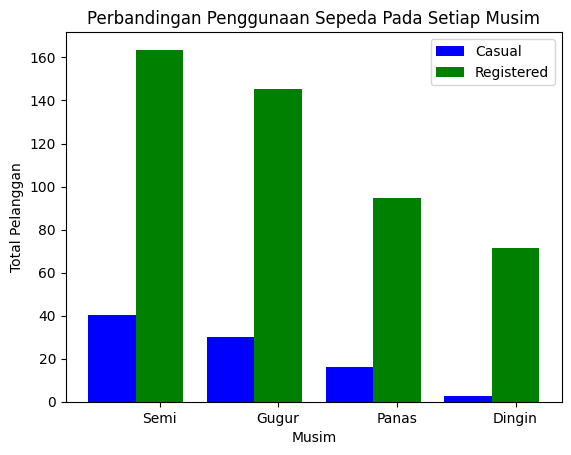

In [ ]:

labels = ['Semi', 'Gugur', 'Panas', 'Dingin']
math_scores = [semi_casual, gugur_casual, panas_casual, dingin_casual]
science_scores = [semi_registered, gugur_registered, panas_registered, dingin_registered]

x = np.arange(len(labels))
width = 0.40

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, math_scores, width, label='Casual', color='b')
rects2 = ax.bar(x, science_scores, width, label='Registered', color='g')

ax.set_xlabel('Musim')
ax.set_ylabel('Total Pelanggan')
ax.set_title('Perbandingan Penggunaan Sepeda Pada Setiap Musim')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


### Pertanyaan 2:

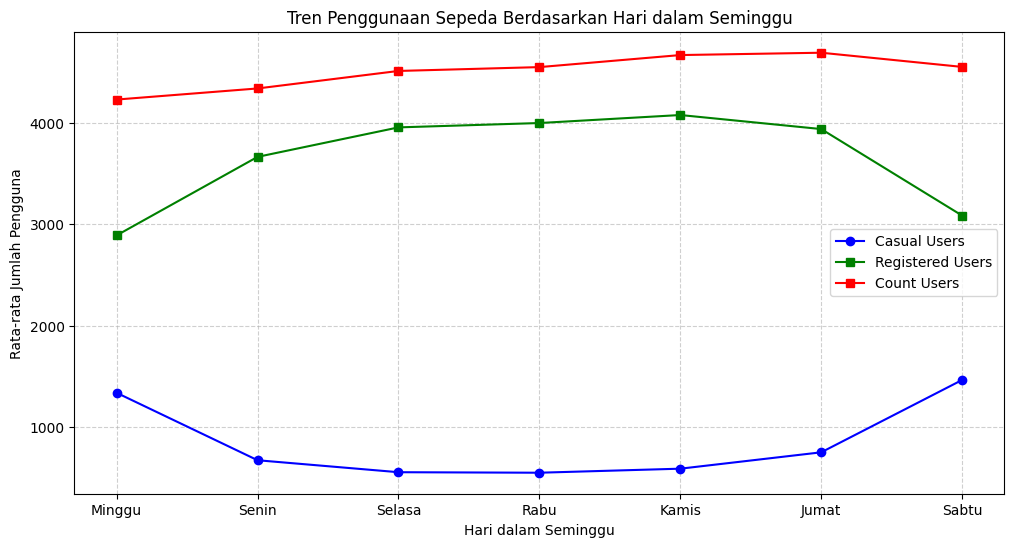

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(avg_casual.index, avg_casual.values, marker='o', linestyle='-', color='b', label='Casual Users')
plt.plot(avg_registered.index, avg_registered.values, marker='s', linestyle='-', color='g', label='Registered Users')
plt.plot(avg_count.index, avg_count.values, marker='s', linestyle='-', color='r', label='Count Users')

plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.title('Tren Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


**Insight:**
- Pada visualisasi pertanyaan pertama terlihat Musim mempengaruhi penggunaan sepeda. Terlihat bahwa musim semi menjadi penggmnaan sepeda terbanyak dan musim dingin menjadi paling rendah dan juga terlihat bahwa pengguna sepeda yang registered lebih banyak daripada yang casual
- lalu pada visualisasi pertanyaan kedua pengguna kasual (Casual Users) cenderung lebih banyak menggunakan sepeda pada akhir pekan (Minggu dan Sabtu). Pengguna terdaftar (Registered Users) lebih stabil dalam penggunaannya sepanjang minggu, dengan peningkatan pada hari kerja (Senin–Kamis) dan sedikit penurunan di akhir pekan.
Total pengguna (Count Users) menunjukkan tren yang relatif stabil dengan sedikit peningkatan di pertengahan minggu dan sedikit penurunan di akhir pekan. Ini menunjukkan bahwa pengguna terdaftar lebih mendominasi tren penggunaan dibandingkan pengguna kasual.

## Analisis Lanjutan (Opsional)

## Conclusion

- Musim mempengaruhi penggunaan sepeda, dengan musim semi memiliki jumlah pengguna tertinggi, sementara musim dingin paling rendah. Dengan mengetahui data tersebut sebagai owner jasa peminjaman sepeda, dapat membuat strategi untuk memberikan diskon yang banyak pada saat musim dingin untuk menarik banyak pelanggan untuk menyewa, selain diskon bisa juga melakukan promosi iklan yang lebih sering pada musim dingin untuk menarik minat pelanggan untuk menyewa.


- Pengguna kasual lebih aktif di akhir pekan, sedangkan pengguna terdaftar lebih stabil sepanjang minggu dengan puncaknya pada hari kerja.
Pengguna terdaftar mendominasi total penggunaan sepeda, yang menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas rutin dibandingkan rekreasi
dan untuk total gabungannya terlihat pada hari jumat merupakan hari yang paling sering penyewa datang baik casual maupun registered oleh karena itu owner dapat menambah persediaan sepeda untuk di pinjam pada hari jumat 